In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
# Load the Dataset
df1 = pd.read_csv('mitbih_train.csv', header=None)
df2 = pd.read_csv('mitbih_test.csv', header=None)
df = pd.concat([df1, df2], axis=0)


In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,...,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000
mean,0.891170,0.758909,0.424503,0.219602,0.201237,0.210298,0.205607,0.201617,0.198480,0.196610,...,0.004937,0.004568,0.004237,0.003914,0.003673,0.003469,0.003210,0.002956,0.002835,0.473439
std,0.239657,0.221190,0.227561,0.207248,0.177191,0.171965,0.178374,0.177020,0.171469,0.168028,...,0.043951,0.042109,0.040471,0.038801,0.037465,0.036552,0.035015,0.033413,0.032620,1.143232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922252,0.682648,0.251014,0.048853,0.082418,0.088300,0.073171,0.066093,0.064893,0.068615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991202,0.826560,0.430174,0.166355,0.147842,0.158640,0.145078,0.144465,0.150073,0.148849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910868,0.579832,0.342707,0.259045,0.287500,0.298343,0.295235,0.290623,0.283465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [9]:
print(data.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


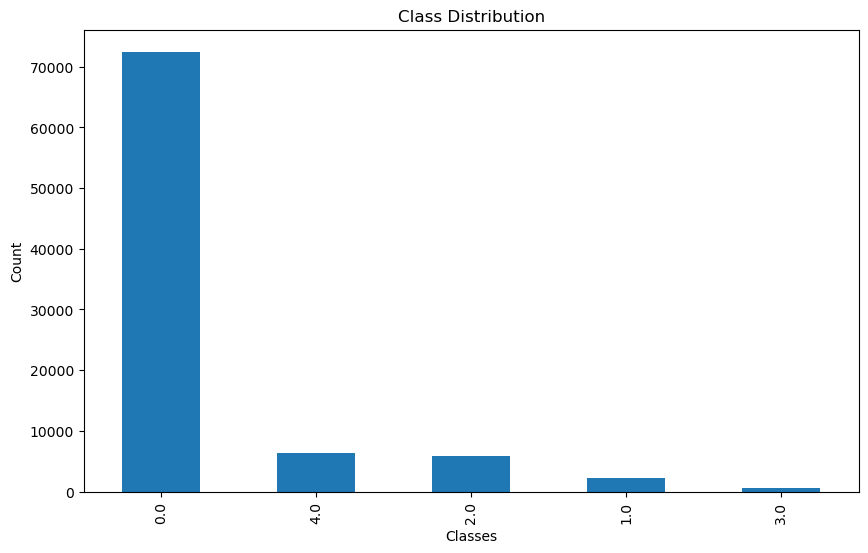

In [10]:
#Visualize the data
plt.figure(figsize=(10, 6))
data[187].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [12]:
#Pre-process the Data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:

# Feature selection using PCA
pca = PCA(n_components=10)  # Adjust the number of components based on experimentation
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)
rf_predictions = rf_classifier.predict(X_test_pca)

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train_pca, y_train)
svm_predictions = svm_classifier.predict(X_test_pca)

# XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train_pca, y_train)
xgb_predictions = xgb_classifier.predict(X_test_pca)


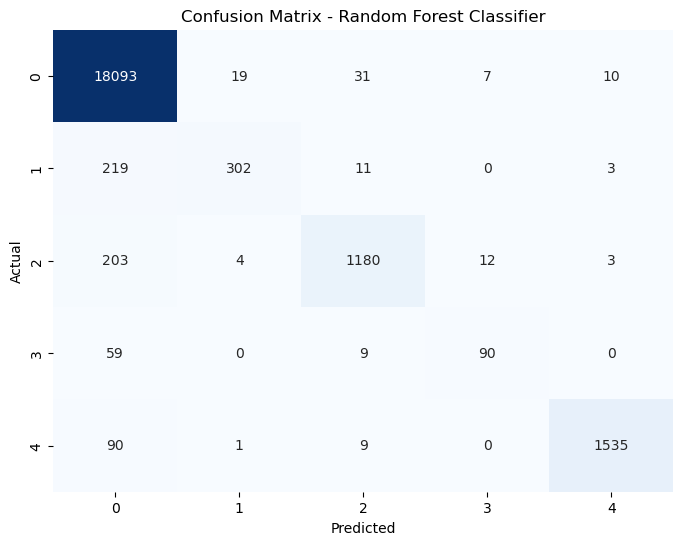

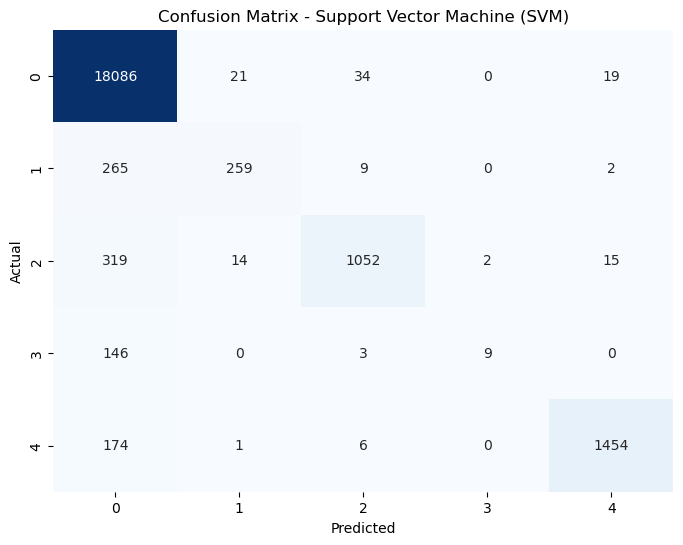

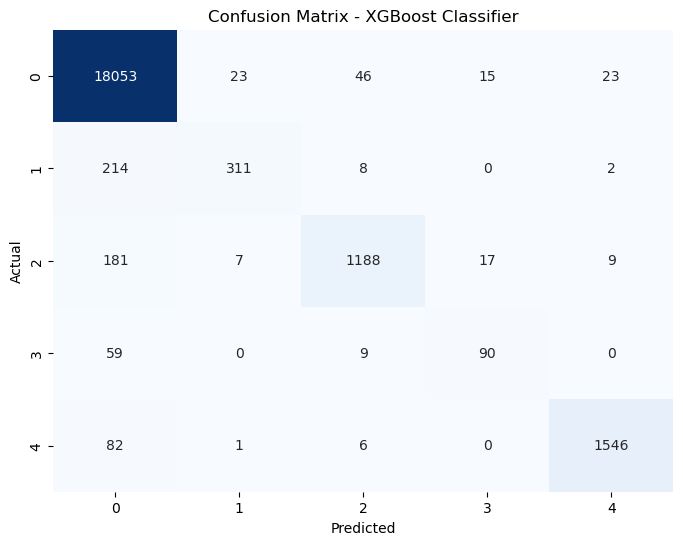

In [21]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Plot confusion matrix for Random Forest Classifier
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest Classifier')

# Plot confusion matrix for Support Vector Machine (SVM)
plot_confusion_matrix(y_test, svm_predictions, 'Support Vector Machine (SVM)')

# Plot confusion matrix for XGBoost Classifier
plot_confusion_matrix(y_test, xgb_predictions, 'XGBoost Classifier')

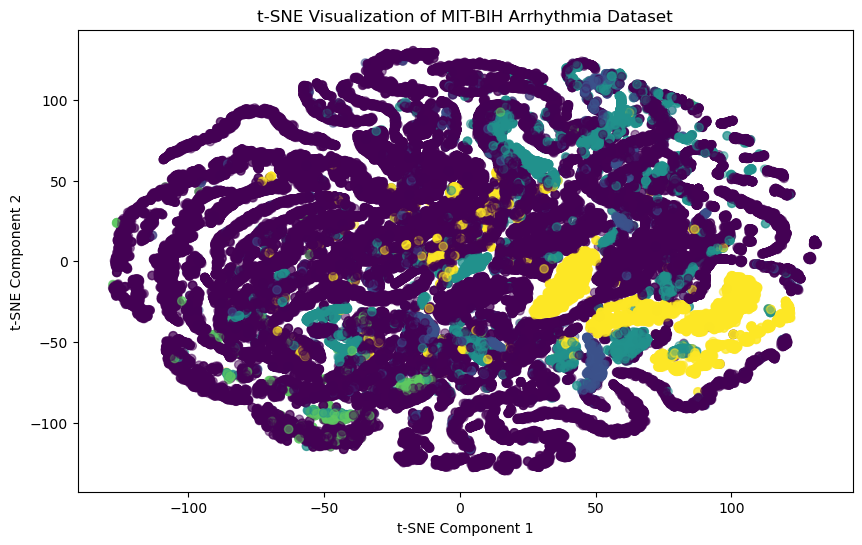

In [14]:

# Dimensionality reduction and visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of MIT-BIH Arrhythmia Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show() 

In [17]:

# Function to evaluate and print model performance
def evaluate_model(predictions, y_true, model_name):
    accuracy = accuracy_score(y_true, predictions)
    print(f'{model_name} Accuracy: {accuracy:.4f}\n')
    print('Classification Report:')
    print(classification_report(y_true, predictions))
    print('Confusion Matrix:')
    print(confusion_matrix(y_true, predictions))
    print('-' * 50)

# Evaluate and compare performances
evaluate_model(rf_predictions, y_test, 'Random Forest Classifier')
evaluate_model(svm_predictions, y_test, 'Support Vector Machine (SVM)')
evaluate_model(xgb_predictions, y_test, 'XGBoost Classifier')

Random Forest Classifier Accuracy: 0.9685

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18160
         1.0       0.93      0.56      0.70       535
         2.0       0.95      0.84      0.89      1402
         3.0       0.83      0.57      0.67       158
         4.0       0.99      0.94      0.96      1635

    accuracy                           0.97     21890
   macro avg       0.93      0.78      0.84     21890
weighted avg       0.97      0.97      0.97     21890

Confusion Matrix:
[[18093    19    31     7    10]
 [  219   302    11     0     3]
 [  203     4  1180    12     3]
 [   59     0     9    90     0]
 [   90     1     9     0  1535]]
--------------------------------------------------
Support Vector Machine (SVM) Accuracy: 0.9529

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     18160
         1.0       0.88      0.

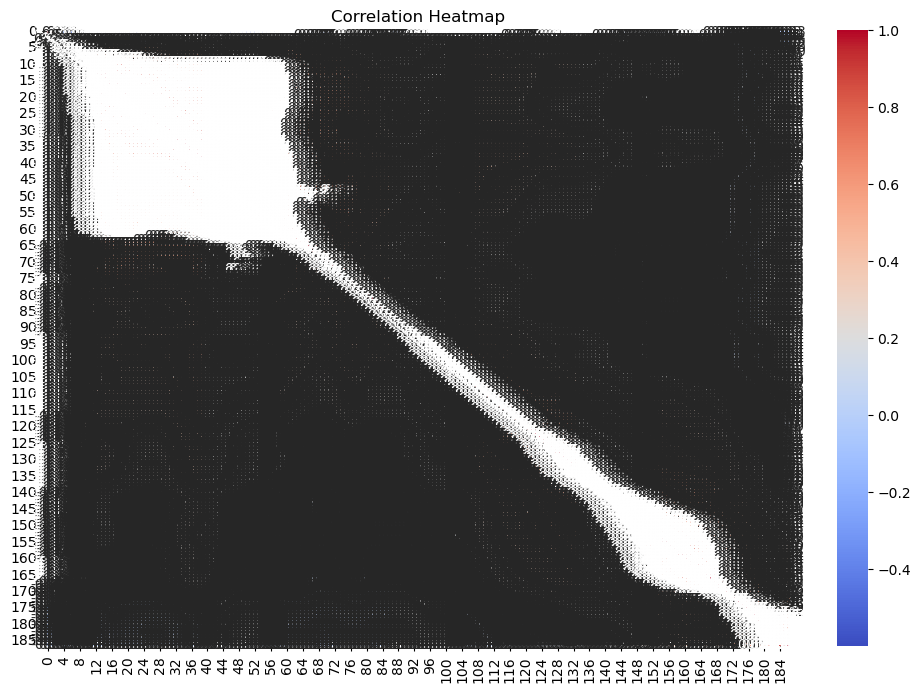

In [22]:
# Compute the correlation matrix
correlation_matrix = data.iloc[:, :-1].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

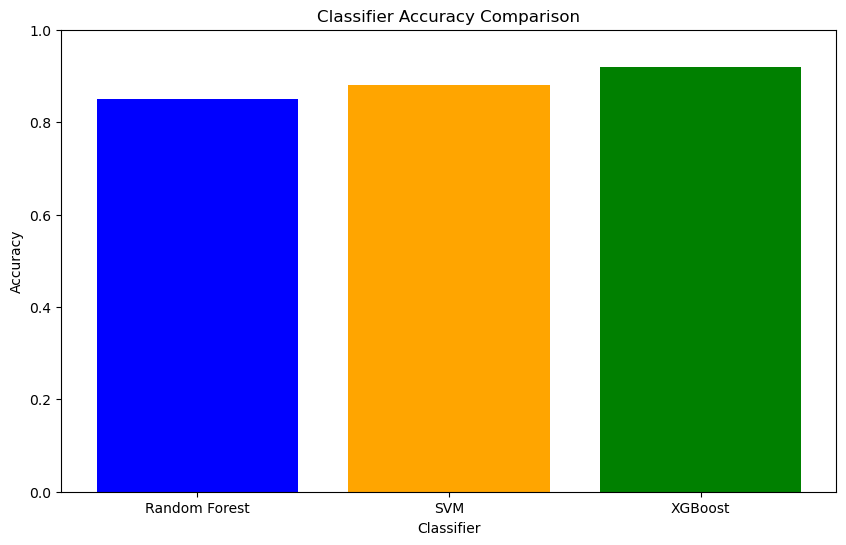

In [25]:
#compare accuracies
rf_accuracy = 0.9685  
svm_accuracy = 0.9529 
xgb_accuracy = 0.9679  

# List of classifiers and their corresponding accuracies
classifiers = ['Random Forest', 'SVM', 'XGBoost']
accuracies = [rf_accuracy, svm_accuracy, xgb_accuracy]

#plot
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green'])
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

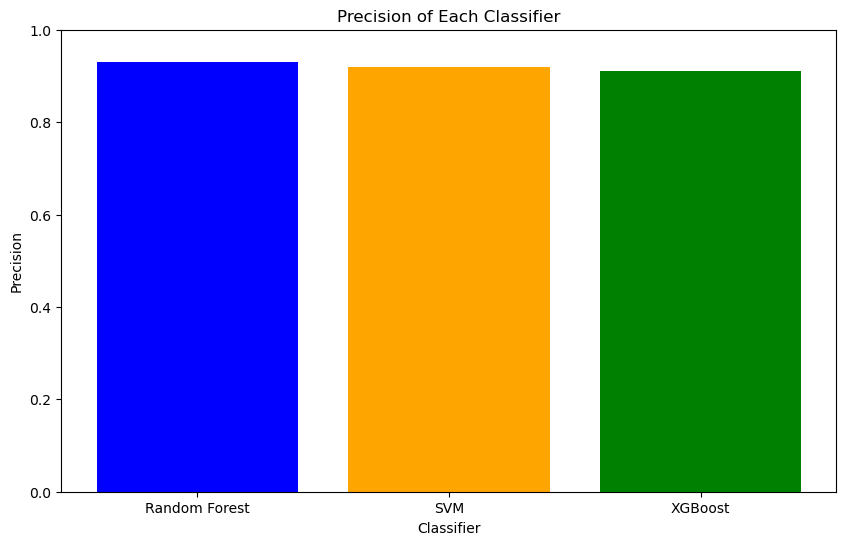

In [26]:
#compare precsion

random_forest_precision = 0.93
svm_precision = 0.92
xgboost_precision = 0.91

# Classifier names
classifiers = ['Random Forest', 'SVM', 'XGBoost']

# Precision values
precision_values = [random_forest_precision, svm_precision, xgboost_precision]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, precision_values, color=['blue', 'orange', 'green'])
plt.title('Precision of Each Classifier')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.show()

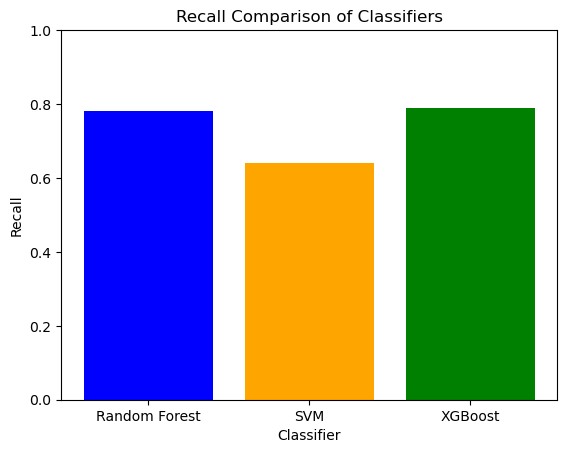

In [27]:
##compare recall values
recall_values = [0.78, 0.64, 0.79]  # Replace these with the actual recall values

classifiers = ['Random Forest', 'SVM', 'XGBoost']

# Plotting the bar chart
plt.bar(classifiers, recall_values, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)  # Set the y-axis limit to ensure the range is between 0 and 1
plt.title('Recall Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.show()

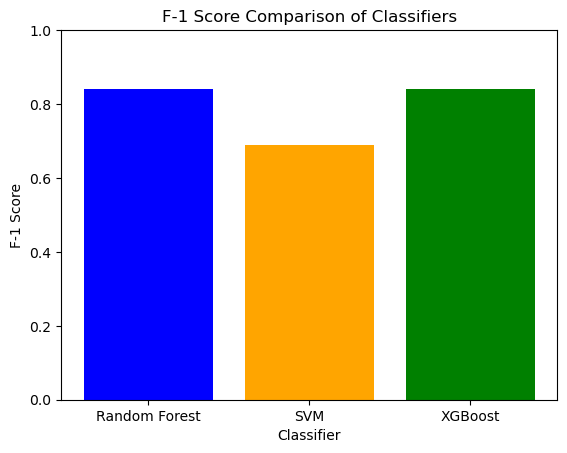

In [28]:
##compare f1-score values
recall_values = [0.84, 0.69, 0.84]  # Replace these with the actual recall values

classifiers = ['Random Forest', 'SVM', 'XGBoost']

# Plotting the bar chart
plt.bar(classifiers, recall_values, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)  # Set the y-axis limit to ensure the range is between 0 and 1
plt.title('F-1 Score Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('F-1 Score')
plt.show()